In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Visualização e Tratamento dos Dados

In [2]:
# Leitura dos dados
Base_Dados = pd.read_csv('unicorns till sep 2022.csv')

In [3]:
# Exibe as 5 primeiras linhas
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
# Retira o símbolo $ dos valores de valuation e transforma os valores em float
Base_Dados['Valuation ($B)'] = Base_Dados['Valuation ($B)'].apply(lambda dado: float(dado.replace('$', '')))

In [5]:
# Exibe as 5 primeiras linhas do dataframe Base_Dados
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [6]:
# Converte as datas para o formato datetime
Base_Dados['Date Joined'] = pd.to_datetime(Base_Dados['Date Joined'])

In [7]:
# Exibe as 5 primeiras linhas do dataframe Base_Dados
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [8]:
# Retorna a data de adesão mais antiga e a mais atual
(Base_Dados['Date Joined'].min(), Base_Dados['Date Joined'].max())

(Timestamp('2007-07-02 00:00:00'), Timestamp('2022-08-24 00:00:00'))

In [9]:
# Verifica os tipos de informações e qntd de valores não-nulos
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         1186 non-null   object        
 1   Valuation ($B)  1186 non-null   float64       
 2   Date Joined     1186 non-null   datetime64[ns]
 3   Country         1186 non-null   object        
 4   City            1186 non-null   object        
 5   Industry        1186 non-null   object        
 6   Investors       1168 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 65.0+ KB


In [10]:
# Soma dos valores nulos de cada coluna do dataframe Base_Dados
Base_Dados.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

**Nota-se que apenas a coluna Investors apresenta valores nulos (18, no total)**

In [11]:
# Valores únicos da coluna Industry, ordenados dos valores de maior frequência para os valores de menor frequência
Base_Dados['Industry'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

**Como apresentado acima, os 5 ramos mais frequentes (Top 5) são *Fintechs*, Serviços e Software, E-commerces, Saúde e Inteligência Artificial. Todas as empresas da base de dados se tornaram Unicórnios** 

**Pode-se notar ainda que para uma mesma classificação das empresas, há 2 escritas diferentes: Artificial intelligence (74 empresas na base de dados) & Artificial Intelligence (11 empresas na base de dados). Essa divergência é corrigida no comando a seguir.**

In [12]:
# Substituíndo 'Artificial intelligence' por 'Artificial Intelligence'
Base_Dados['Industry'] = Base_Dados['Industry'].replace('Artificial intelligence','Artificial Intelligence')

In [13]:
# Exibe as 5 primeiras linhas do dataframe Base_Dados, com novos valores únicos
Base_Dados['Industry'].value_counts().head()

Fintech                            239
Internet software & services       224
E-commerce & direct-to-consumer    103
Health                              94
Artificial Intelligence             85
Name: Industry, dtype: int64

**Após a correção da divergência nas nomenclaturas, o ramo Artificial Intelligence apresenta 85 empresas.**

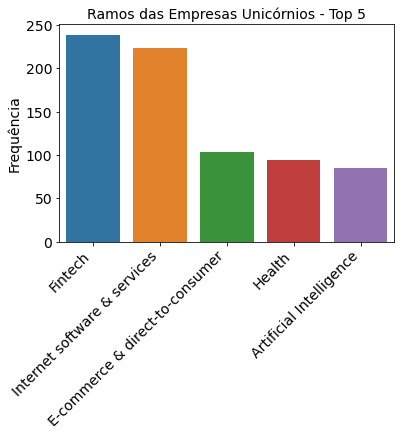

In [14]:
plt.title('Ramos das Empresas Unicórnios - Top 5', fontsize=14) # Config um título para a figura
sns.barplot(x = Base_Dados['Industry'].value_counts().index[0:5], y = Base_Dados['Industry'].value_counts().head())
plt.tick_params(axis='y', which='major', labelsize=14) # Config os valores de freq no eixo y
plt.xticks(rotation=45, ha='right', fontsize=14) # Config a rotação da legenda em x
plt.ylabel('Frequência', fontsize=14); # Config a legenda em y

**O gráfico acima isola as 5 empresas (unicórnios) mais frequêntes da base de dados.**

In [15]:
Analise = round(Base_Dados['Industry'].value_counts(normalize=True) * 100, 1) # Análise percentual das empresas Unicórnios
Analise.head().sum() # Retorna o percentual correspondente ao Top 5 dos ramos que mais geram Unicórnios

62.9

**O Top 5 dos ramos das empresas que mais geraram unicórnios corresponde a 62,9% das empresas presentes na base de dados**

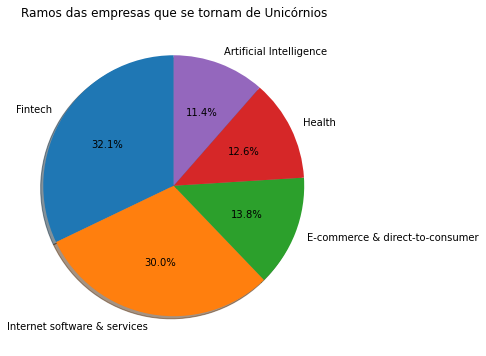

In [16]:
# Plot geral dos ramos das empresas
plt.figure( figsize=(15,6) )
plt.title('Ramos das empresas que se tornam de Unicórnios')
plt.pie(
    Analise.head(),
    labels = Analise.index[0:5],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

**O gráfico de pizza acima ilustra o percentual correspondente a cada uma das empresas do top 5. Por exemplo, as *Fintechs* correspondem a 32,1% das empresas da base de dados que mais geraram unicórnios.**

In [17]:
# Top 10 dos Países que mais geram Unicórnios
Analise_qntd = Base_Dados['Country'].value_counts()
Analise_qntd.head(10)

United States     636
China             174
India              70
United Kingdom     46
Germany            29
France             24
Israel             22
Canada             19
Brazil             17
South Korea        17
Name: Country, dtype: int64

**A maior parte das empresas unicórnios se encontram nos EUA. O Brasil está em 9° lugar nessa base de dados.**

In [18]:
Analise_perc = round(Base_Dados['Country'].value_counts(normalize=True) * 100, 1)

In [19]:
# Top 10 dos Países que mais geram Unicórnios (valores em percentual)
Analise_perc.head(10)

United States     53.6
China             14.7
India              5.9
United Kingdom     3.9
Germany            2.4
France             2.0
Israel             1.9
Canada             1.6
Brazil             1.4
South Korea        1.4
Name: Country, dtype: float64

**De acordo com a base de dados, os EUA é o país que mais geram unicórnios em 53,6% das vezes. O Brasil encontra-se em 9° lugar no ranking com 1,4%.**

## Agrupamento dos dados

In [20]:
# Extrai o ano e mês da coluna Date Joined e armazena os dados nas colunas Month e Year, respectivamente
Base_Dados['Month'] = pd.DatetimeIndex( Base_Dados['Date Joined'] ).month
Base_Dados['Year'] = pd.DatetimeIndex( Base_Dados['Date Joined'] ).year

Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Month,Year
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [21]:
# Cria uma coluna de id's
Base_Dados['id'] = Base_Dados.index
Base_Dados.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors,Month,Year,id
0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017,0
1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012,1
2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018,2
3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014,3
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018,4


In [22]:
# Agrupa os dados por país, ano, mês e empresa
Analise_agrupada = Base_Dados.groupby( by=['Country', 'Year', 'Month', 'Company'] ).count()['id'].reset_index()

Analise_agrupada

,Country,Year,Month,Company,id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1
1184,Vietnam,2021,10,Sky Mavis,1


**O dataframe Analise_agrupada exibe os dados agrupados por país (das empresas unicórnios), ano e mês (em que se tornaram unicórnios) e os nomes das empresas. A seguir, são exibidas apenas as empresas brasileiras que se tornaram unicórnios.**

In [23]:
# Empresas no Brasil que se tornaram Unicórnios
Analise_agrupada.loc[Analise_agrupada['Country'] == 'Brazil'].sort_values('Year', ascending=False).reset_index(drop = True)

,Country,Year,Month,Company,id
0,Brazil,2022,5,Dock,1
1,Brazil,2022,2,Neon,1
2,Brazil,2021,1,MadeiraMadeira,1
3,Brazil,2021,12,Olist,1
4,Brazil,2021,10,CargoX,1
5,Brazil,2021,9,CloudWalk,1
6,Brazil,2021,8,Unico,1
7,Brazil,2021,8,Nuvemshop,1
8,Brazil,2020,12,Creditas,1
9,Brazil,2020,12,C6 Bank,1


**De acordo com a base de dados, a empresa Dock é a empresa mais recente a se tornar um unicórnio no Brasil, no mês de maio (mês de n° 5) do ano de 2022.**

In [24]:
# Agrupa os dados por país e retorna as colunas Country e Valuation
Analise_Pais = Base_Dados.groupby( by=['Country'] ).sum()['Valuation ($B)'].reset_index()

# Organiza os dados do maior para o menor valor de Valuation
Analise_Valor = Analise_Pais.sort_values('Valuation ($B)', ascending=False)

# Retorna as 10 primeiras linhas
Analise_Valor.reset_index(drop = True).head(10)

,Country,Valuation ($B)
0,United States,2069.89
1,China,678.59
2,United Kingdom,205.45
3,India,202.92
4,Germany,80.88
5,France,58.42
6,Australia,54.40
7,Canada,49.23
8,Israel,48.02
9,Brazil,40.08


**Se somados todos os valores de mercado das empresas unicórnios de cada país, conclui-se que a maior soma encontra-se nos EUA (mais de 2 trilhões de dólares). O Brasil encontra-se em 10° lugar no ranking com uma soma de mais de 40 bilhões de dólares. A seguir, as mesmas informações acima, contidas no dataframe Analise_Valor, são exibidas em 2 formas gráficas diferentes: gráfico de barras e gráfico de linhas com marcadores.**

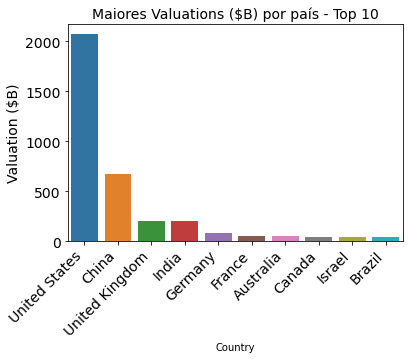

In [25]:
head = 10 # Config quantos países serão plotados no gráfico
plt.title('Maiores Valuations ($B) por país - Top 10', fontsize=14) # Config um título para a figura
sns.barplot(x = Analise_Valor['Country'].head(head), y = Analise_Valor['Valuation ($B)'].head(head))
plt.tick_params(axis='y', which='major', labelsize=14) # Config os valores de freq no eixo y
plt.xticks(rotation=45, ha='right', fontsize=14) # Config a rotação da legenda em x
plt.ylabel('Valuation ($B)', fontsize=14); # Config a legenda em y

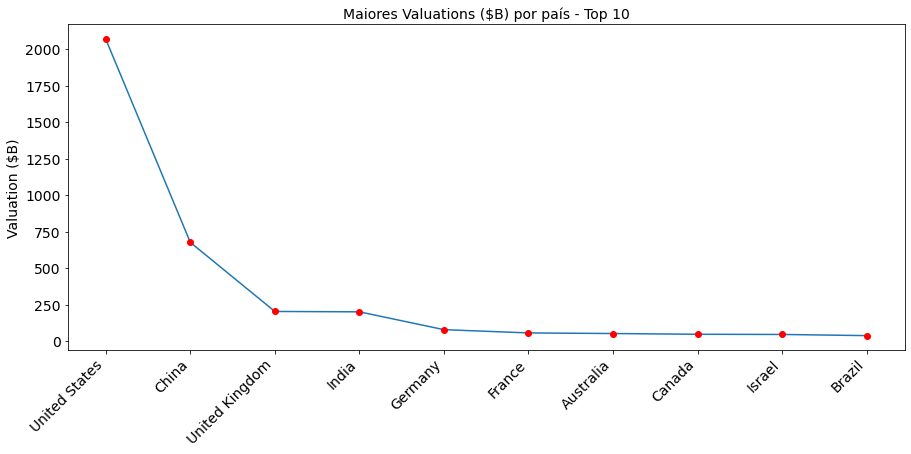

In [26]:
head = 10 # Config quantos países serão plotados no gráfico
plt.figure(figsize=(15,6))
plt.plot(Analise_Valor['Country'].head(head), Analise_Valor['Valuation ($B)'].head(head), marker='o', mec = 'r', mfc = 'r')
plt.title('Maiores Valuations ($B) por país - Top 10',fontsize=14) # Config um título para a figura
plt.xticks(rotation=45, ha='right',fontsize=14); # Config a rotação das legendas no eixo x
plt.ylabel('Valuation ($B)', fontsize=14); # Config a legenda em y
plt.tick_params(axis='y', which='major', labelsize=14) # Config os valores de freq no eixo y